<a href="https://colab.research.google.com/github/duhajarrar/TelecomMIT/blob/main/telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###nibaaalll
#hamza
#raha
import pandas as pd
import numpy as np
trainingData = pd.read_csv("drive/MyDrive/Telecom.csv")


In [ ]:
trainingData.info()

In [ ]:
trainingData.head(10)

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
trainingData['state'] = label_encoder.fit_transform(trainingData['state'])
trainingData['international plan'] = label_encoder.fit_transform(trainingData['international plan'])
trainingData['voice mail plan'] = label_encoder.fit_transform(trainingData['voice mail plan'])
trainingData['churn'] = label_encoder.fit_transform(trainingData['churn'])
trainingData['phone number'] = trainingData['phone number'].str.replace(r'-','')
trainingData[['phone number']] = trainingData[['phone number']].apply(pd.to_numeric)

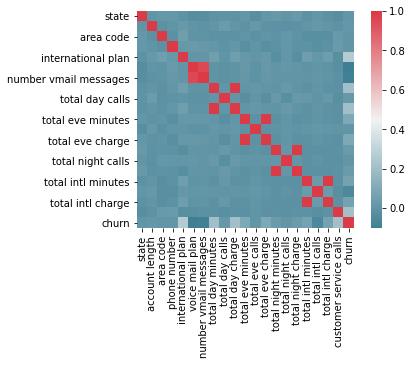

In [12]:
import seaborn as sns
corr = trainingData.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [15]:
col=trainingData.columns
print(col)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


Churn Percentage = 14.491449144914492


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


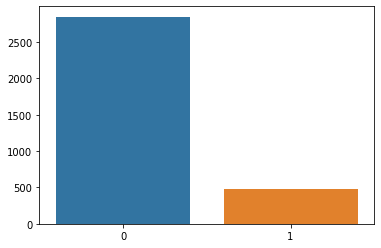

In [35]:
y = trainingData['churn'].value_counts()
sns.barplot(y.index, y.values)
y_True = trainingData["churn"][trainingData["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / trainingData["churn"].shape[0]) * 100 ))

In [37]:
trainingData.describe()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,3.746291e+06,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,42.371290,2.746626e+05,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,3.508680e+06,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,415.000000,3.748187e+06,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,3.985970e+06,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,4.229964e+06,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


international plan


(array([346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

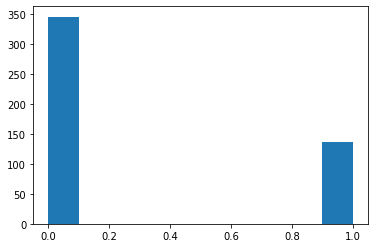

In [29]:
from matplotlib.pyplot import hist
print(col[4])
hist(trainingData[col[4]],weights=trainingData['churn'])

area code


(array([358.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.]),
 array([408. , 418.2, 428.4, 438.6, 448.8, 459. , 469.2, 479.4, 489.6,
        499.8, 510. ]),
 <a list of 10 Patch objects>)

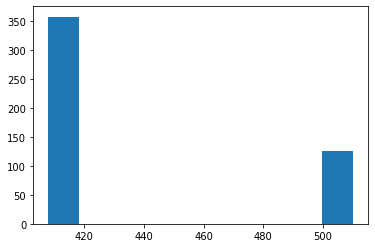

In [38]:
from matplotlib.pyplot import hist
print(col[2])
hist(trainingData[col[2]],weights=trainingData['churn'])

total day minutes


(array([  1.,   9.,  21.,  67.,  87.,  45.,  84., 100.,  49.,  20.]),
 array([  0.  ,  35.08,  70.16, 105.24, 140.32, 175.4 , 210.48, 245.56,
        280.64, 315.72, 350.8 ]),
 <a list of 10 Patch objects>)

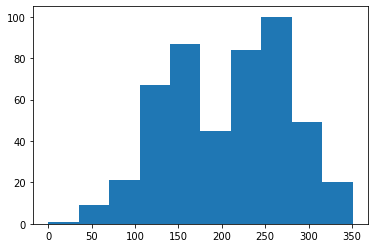

In [30]:
from matplotlib.pyplot import hist
print(col[7])
hist(trainingData[col[7]],weights=trainingData['churn'])

total day charge


(array([  1.,   9.,  21.,  67.,  87.,  45.,  84., 100.,  49.,  20.]),
 array([ 0.   ,  5.964, 11.928, 17.892, 23.856, 29.82 , 35.784, 41.748,
        47.712, 53.676, 59.64 ]),
 <a list of 10 Patch objects>)

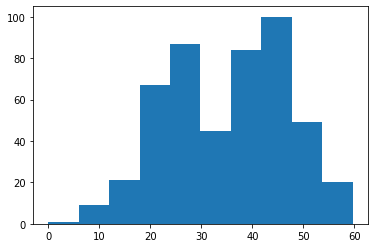

In [31]:
from matplotlib.pyplot import hist
print(col[9])
hist(trainingData[col[9]],weights=trainingData['churn'])

customer service calls


(array([ 92., 122.,  87.,  44.,  76.,  40.,  14.,   5.,   1.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

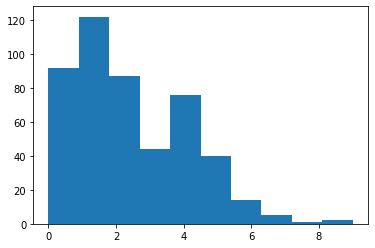

In [32]:
from matplotlib.pyplot import hist
print(col[19])
hist(trainingData[col[19]],weights=trainingData['churn'])